In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv('daily_percentage_change.csv')

display(df.head())

,date,ETH,LTC,DASH,XRP,BTC
0,2015-08-08,-72.804152,-8.551069,-5.521472,3.974485,-6.645683
1,2015-08-09,-6.826801,1.298701,0.974026,3.916942,1.563218
2,2015-08-10,0.933328,1.282051,-0.964630,-0.658492,-0.230119
3,2015-08-11,51.034374,5.316456,2.597403,-1.817143,2.238439
4,2015-08-12,14.018692,-4.086538,-3.164557,-3.724828,-1.483043


In [79]:
dsc = df.describe()

display(dsc)

mean = dsc.loc['mean', :]
print mean['LTC']

,ETH,LTC,DASH,XRP,BTC
count,824.000000,824.000000,824.000000,824.000000,824.000000
mean,0.920014,0.475404,0.716709,0.693835,0.462475
std,8.059214,5.647949,5.813453,9.067882,3.551501
min,-72.804152,-32.642151,-21.590494,-46.004676,-18.741098
25%,-2.581657,-1.247301,-2.179047,-1.758197,-0.678408
50%,-0.130492,0.000000,0.000000,-0.395146,0.293414
75%,3.370367,1.351631,2.982844,1.497623,1.784315
max,51.034374,66.587112,44.644982,179.366892,23.936079


0.475404489332


### Correlation
Checking is there direct correlation between chenge of eth price and changes of other currencies

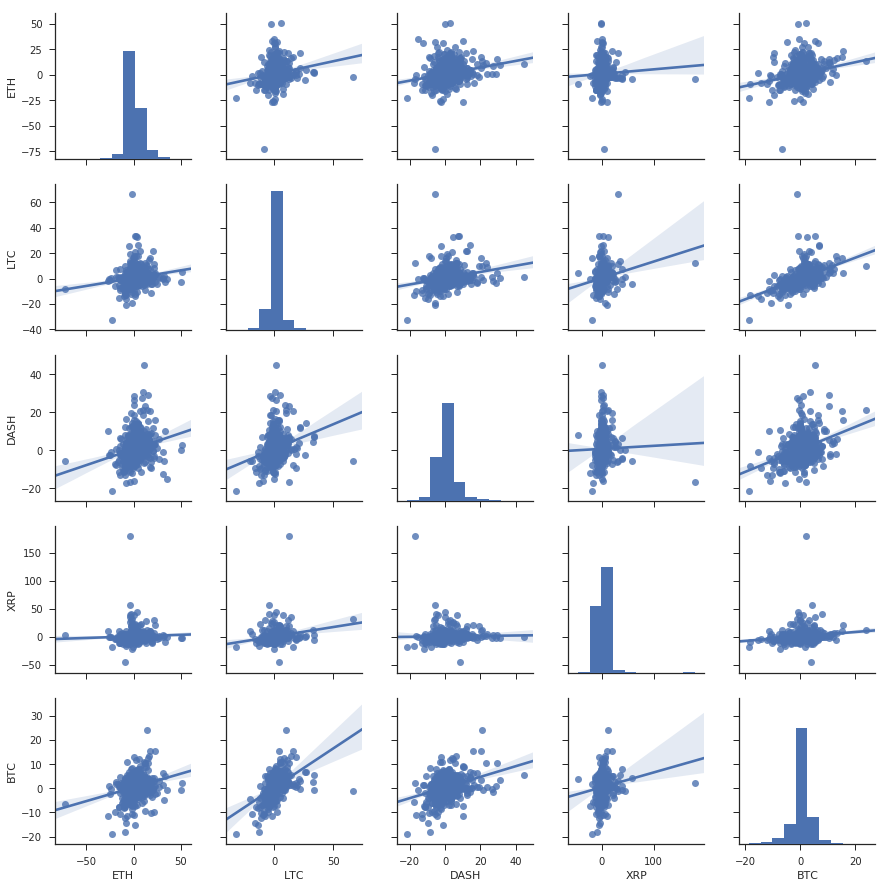

In [80]:
sns.set(style="ticks")

sns.pairplot(df, kind="reg")
plt.show()

### Correlation with delay
Checking is there any correlation between chenge in eth price and changes of other currencties with couple days delay

In [81]:
def generate_daily_correlation(df, coin, corelated_coin):
    el_df = df[[coin, corelated_coin]]
    el_df.columns = [coin, 'd0']

    for n in range(1,16):
        el_df['d'+str(n)]=el_df['d0'].shift(-n)

    cr = el_df.corr().loc[coin,:].drop(coin)
    
    return cr

crs = []

coins_to_check = ['LTC', 'DASH', 'XRP', 'BTC']

for _, c in enumerate(coins_to_check):
    crs.append(generate_daily_correlation(df, 'ETH', c))
               
               
cr_df = pd.DataFrame(crs, index = coins_to_check)


/home/dev/anaconda3/envs/mn_nanodegree/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


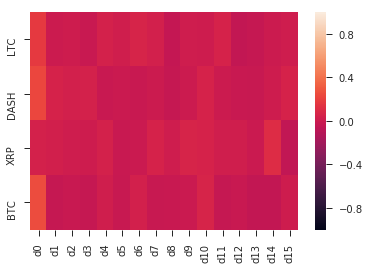

In [82]:
sns.heatmap(cr_df, vmin=-1, vmax=1)
plt.show()